In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers, Input
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Activation

In [350]:
df = pd.read_csv('Preprocessed_data.csv')


df.index = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.drop(['Date', 'Salmon_exp_price'], axis=1, inplace=True)

In [351]:
y = df['Salmon_exp_vol']
X = df.loc[:,'FX_EURONOK':]

In [402]:
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    test_size=0.2,
                                                    shuffle=False)

In [403]:
X_train['FX_EURONOK']['2002-10-14'] = 7.34
X_train['FX_EURONOK']['2008-08-04'] = 7.9995
X_train['FX_EURONOK']['2008-08-08'] = 7.9915
X_train['FX_EURONOK']['2008-08-11'] = 7.9975
X_train['FX_EURONOK']['2008-08-18'] = 7.9740

In [404]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import FunctionTransformer

In [470]:
def log_transformation(X):
    X['FX_EURONOK'] = np.log1p(X['FX_EURONOK'])
    return X
loger = FunctionTransformer(func=log_transformation)

normalizer = StandardScaler()

def reshaper(X):
    X_reshaped = X.reshape(X.shape[0], 1, X.shape[1])    
    return   X_reshaped
reshape = FunctionTransformer(func=reshaper)

model = keras.Sequential([
    layers.LSTM(3, input_shape=(1,3)),
    layers.Dropout(0.4),
    layers.Dense(3, activation='relu'),
    # layers.BatchNormalization(),
    # layers.Dense(2, activation='relu'),
    layers.Dense(1)
])
model.compile(optimizer='adam',
              loss='mae')

my_pipe = Pipeline(steps=[
    ('log', loger),
    ('scaler', normalizer),
    ('res', reshape),
    ('lstm', model)
])

my_pipe.fit(X_train, y_train, lstm__epochs=10, lstm__batch_size=100)
train_pred = my_pipe.predict(X_train)
test_pred = my_pipe.predict(X_test)

Epoch 1/10
10/10 [==============================] - 1s 2ms/step - loss: 11605.2139
Epoch 2/10
10/10 [==============================] - 0s 2ms/step - loss: 11605.1826
Epoch 3/10
10/10 [==============================] - 0s 4ms/step - loss: 11605.1445
Epoch 4/10
10/10 [==============================] - 0s 2ms/step - loss: 11605.1064
Epoch 5/10
10/10 [==============================] - 0s 2ms/step - loss: 11605.0605
Epoch 6/10
10/10 [==============================] - 0s 1ms/step - loss: 11605.0166
Epoch 7/10
10/10 [==============================] - 0s 2ms/step - loss: 11604.9639
Epoch 8/10
10/10 [==============================] - 0s 2ms/step - loss: 11604.9219
Epoch 9/10
10/10 [==============================] - 0s 2ms/step - loss: 11604.8652
Epoch 10/10
8/8 [==============================] - 0s 540us/step


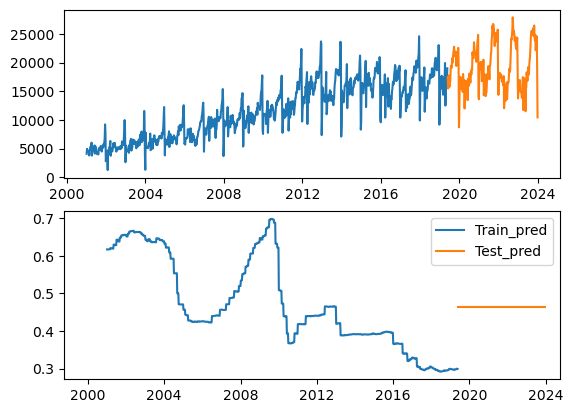

In [469]:
fig,ax = plt.subplots(2)
ax[0].plot(y_train, label='Train')
ax[0].plot(y_test, label='Test')

ax[1].plot(X_train.index, train_pred, label='Train_pred')
ax[1].set_xlim(10500,20000)
ax[1].plot(X_test.index, test_pred, label='Test_pred')

plt.legend()
plt.show()

In [427]:
# cols = ['a','b','c']
# a =  [pred[i][0][0] for i in range(0,len(pred),1)]
# b =  [pred[i][0][1] for i in range(0,len(pred),1)]
# c =  [pred[i][0][2] for i in range(0,len(pred),1)]

# new_df =  pd.DataFrame([a,b,c])
# new_df

In [76]:
history = model.fit(
    X_tr_re, y_train,
    # validation_data=(X_valid, y_valid),
    batch_size=60,
    epochs=100,
    verbose=0,
)

In [68]:
history_df = pd.DataFrame(history.history)
history_df

,loss
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
95,NaN
96,NaN
97,NaN
98,NaN


<AxesSubplot:>

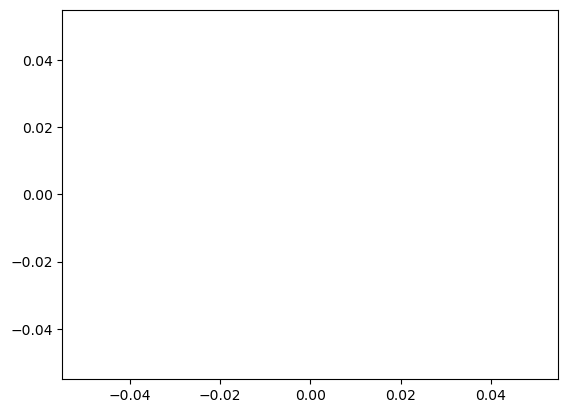

In [69]:
history_df['loss'].plot()

In [70]:
trainPredict = model.predict(X_tr_re)
trainPredict

30/30 [==============================] - 0s 1ms/step


array([[[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]]

In [331]:
trainPredict.flatten()

array([13.969868, 13.969868, 13.969868, 13.969868, 13.969868, 13.969868,
       13.969868, 13.969868, 13.969868, 13.969868, 13.969868, 13.969868,
       13.969868, 13.969868, 13.969868, 13.969868, 13.969868, 13.969868,
       13.969868, 13.969868, 13.969868, 13.969868, 13.969868, 13.969868,
       13.969868, 13.969868, 13.969868, 13.969868, 13.969868, 13.969868,
       13.969868, 13.969866, 13.969866, 13.969866, 13.969866, 13.969865,
       13.969865, 13.969865, 13.969865, 13.969865, 13.969865, 13.969865,
       13.969865, 13.969865, 13.969866, 13.969866, 13.969866, 13.969866,
       13.969866, 13.969866, 13.969866, 13.969866, 13.969866, 13.969863,
       13.969863, 13.969863, 13.969863, 13.969867, 13.969867, 13.969867,
       13.969867, 13.969868, 13.969868, 13.969868, 13.969868, 13.969868,
       13.969868, 13.969868, 13.969868, 13.969868, 13.969869, 13.969869,
       13.969869, 13.969869, 13.969868, 13.969868, 13.969868, 13.969868,
       13.969868, 13.969868, 13.969868, 13.969868, 

In [323]:
from sklearn.metrics import mean_absolute_error as mae

In [333]:
mae(trainPredict.flatten(), y_train)

11591.374923262